In [103]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

In [104]:
base_dir = "./archive"

train_cat_path = os.path.join(base_dir, "training_set", "training_set", "cats")
test_cat_path = os.path.join(base_dir, "test_set", "test_set", "cats")
train_dog_path = os.path.join(base_dir, "training_set", "training_set", "dogs")
test_dog_path = os.path.join(base_dir, "test_set", "test_set", "dogs")

In [105]:
def read_image_set(path, gray_scale = False, target_shape = (200, 200)):
    animals = []
    for file in tqdm(os.listdir(path)):
        current_img = plt.imread(os.path.join(path, file))
        current_img = cv2.resize(current_img, target_shape)
        # Convert to grayscale
        if gray_scale:
            current_img = cv2.cvtColor(current_img, cv2.COLOR_RGB2GRAY)
        animals.append(current_img)
    return animals

In [106]:
print(f"Reading cat images...")
cats = read_image_set(train_cat_path, gray_scale = False)

print(f"Reading dog images...")
dogs = read_image_set(train_dog_path, gray_scale = False)

Reading cat images...


100%|█████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:16<00:00, 248.30it/s]


Reading dog images...


100%|█████████████████████████████████████████████████████████████████████████████| 4005/4005 [00:19<00:00, 205.45it/s]


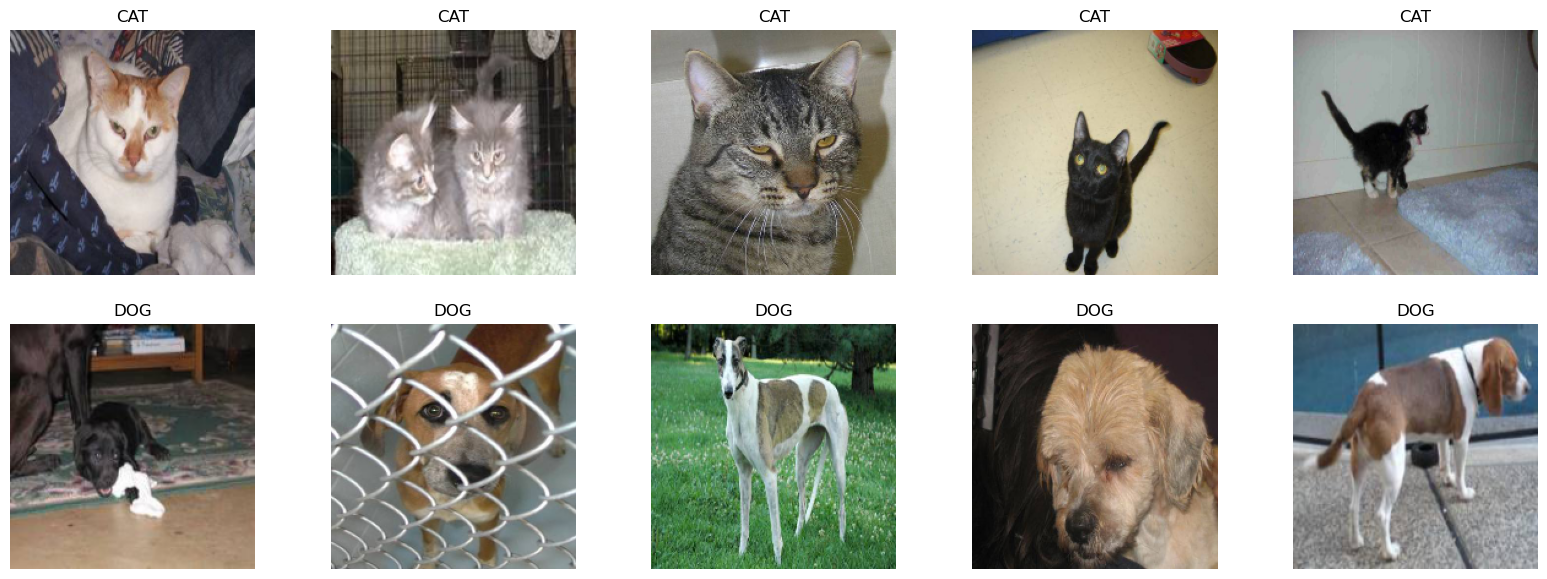

In [108]:
num_images = 5
_, axes = plt.subplots(2, num_images, figsize=(20, 7))

for i in range(num_images):
    axes[0, i].imshow(cats[random.randint(0, len(cats)-1)])
    axes[0, i].axis("off")
    axes[0, i].set_title("CAT")
    
    axes[1, i].imshow(dogs[random.randint(0, len(dogs)-1)])
    axes[1, i].axis("off")
    axes[1, i].set_title("DOG")
    
plt.show()

In [109]:
#Create the training set
from sklearn.model_selection import train_test_split

training = cats + dogs
training_labels = [1]*len(cats) + [0]*len(dogs)

train_data, val_data, train_labels, val_labels = train_test_split(training, training_labels, test_size=0.2, random_state=42)
train_data, val_data, train_labels, val_labels = np.array(train_data), np.array(val_data), np.array(train_labels), np.array(val_labels)

#train_data = tf.expand_dims(train_data, axis=-1)
#val_data = tf.expand_dims(val_data, axis=-1)

print(f"Size of train data {train_data.shape}, size of labels {train_labels.shape}")
print(f"Size of validation data {val_data.shape}, size of labels {val_labels.shape}")

images_shape = train_data[0].shape

Size of train data (6404, 200, 200, 3), size of labels (6404,)
Size of validation data (1601, 200, 200, 3), size of labels (1601,)


In [110]:
# Create network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, BatchNormalization, AveragePooling2D
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=images_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(AveragePooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate = 1e-5), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_63 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 198, 198, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_54 (MaxPooli  (None, 99, 99, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_64 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_55 (MaxPooli  (None, 48, 48, 64)        0         
 ng2D)                                                           
                                                     

In [102]:
# Train network
history = model.fit(
    x = train_data,
    y = train_labels,
    batch_size = 32,
    epochs = 50,
    validation_data = (val_data, val_labels)
)

Epoch 1/50
111/201 [===============>..............] - ETA: 1:43 - loss: 0.6823 - accuracy: 0.5563

KeyboardInterrupt: 

In [ ]:
# Evaluate
